回归 每个时间点的输出 sin cos

In [4]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.utils.data as Data
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [3]:
torch.manual_seed(1)
#hyper Parameters
TIME_STEP = 10
INPUT_SIZE = 1
LR = 0.01

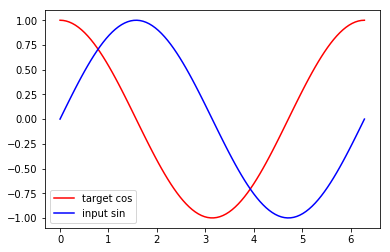

In [7]:
steps  =np.linspace(0,np.pi*2,100,dtype=np.float32)
x_np = np.sin(steps)
y_np = np.cos(steps)
plt.plot(steps,y_np,'r',label='target cos')
plt.plot(steps,x_np,'b',label='input sin')
plt.legend(loc='best')
plt.show()

In [11]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN,self).__init__()
        self.rnn=nn.RNN(
            input_size = INPUT_SIZE,
            hidden_size = 32,
            num_layers = 1,
            batch_first = True
        )
        self.out =nn.Linear(32,1)
    def forward(self,x,h_state):
        #x (batch,time_step,input_size)
        #h_state (n_layers,batch,hidden_size)
        #r_out (batch,time_step,output_size)
        r_out,h_state = self.rnn(x,h_state)
        outs = []
        for time_step in range(r_out.size(1)):
            outs.append(self.out(r_out[:,time_step,:]))
        return torch.stack(outs,dim=1),h_state
rnn=RNN()
print(rnn)
        

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)


In [13]:
optimizer = torch.optim.Adam(rnn.parameters(),lr=LR)
loss_func = nn.MSELoss()
h_state = None
for step in range(60):
    start,end = step*np.pi,(step+1)*np.pi
    steps = np.linspace(start,end,TIME_STEP,dtype=np.float32)
    x_np = np.sin(steps)
    y_np = np.cos(steps)
    
    x = torch.from_numpy(x_np[np.newaxis, :, np.newaxis])    # shape (batch, time_step, input_size)
    y = torch.from_numpy(y_np[np.newaxis, :, np.newaxis])
    prediction,h_state=rnn(x,h_state)
    h_state = h_state.data
    loss = loss_func(prediction,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if step%10==0:
        print(loss.data.numpy())

0.39431486
0.15622103
0.049675517
0.03738152
0.014348892
0.0030836295
